In [1]:
#На основе приложенных данных (файл testProdAnl.csv) проанализировать последствия изменения алгоритма сбора команд для участия в бою:
#1) самостоятельно определить дату внесения изменения в алгоритм
#2) визуализировать последствия изменения, описать их. 
#3) оценить эффект изменения в каждом из сегментов игроков по уровням. В бою могут участвовавать игроки примерно одного уровня, но четкой границы нет (зависит о времени суток, эффективности игрока и т.д.)
#4) охарактеризовать изменение как позитивное или негативное с точки зрения игрока, обосновать свою точку зрения

#user_id - уникальный идентификатор игрока
#battle_id - уникальный идентификатор боя, в котором участвовал игрок
#team - идентификатор команды (принимает значение 1 или 2)
#start_time - день, в который проходил бой
#level - уровень игрока (в бою могут принимать участие игроки разных уровней)
#frags - кол-во убитых игроком противников в бою
#deaths - кол-во смертей игрока в бою (в игре можно умереть не будучи при этом убитым противником, например, подорвавшись на собственной гранате)
#assists - кол-во противников, убитых другими, но при этом им был нанесен значительный урон игроком.

In [2]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('testProdAnl.csv')

In [4]:
df.head()

,user_id,battle_id,team,start_time,level,frags,deaths,assists
0,429769,5817db18-c398-6a01-7af8-3dd29d1fd781,1,2016-11-01,40,13,4,6
1,311033,5817db18-c398-6a01-7af8-3dd29d1fd781,1,2016-11-01,34,12,9,7
2,402849,5817db18-c398-6a01-7af8-3dd29d1fd781,1,2016-11-01,38,11,5,6
3,24488,5817db18-c398-6a01-7af8-3dd29d1fd781,1,2016-11-01,34,8,7,12
4,447678,5817db18-c398-6a01-7af8-3dd29d1fd781,2,2016-11-01,29,8,8,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666296 entries, 0 to 666295
Data columns (total 8 columns):
user_id       666296 non-null int64
battle_id     666296 non-null object
team          666296 non-null int64
start_time    666296 non-null object
level         666296 non-null int64
frags         666296 non-null int64
deaths        666296 non-null int64
assists       666296 non-null int64
dtypes: int64(6), object(2)
memory usage: 40.7+ MB


In [6]:
df.shape

(666296, 8)

In [7]:
df.sort_values(by ='start_time',ascending=True).head()

,user_id,battle_id,team,start_time,level,frags,deaths,assists
0,429769,5817db18-c398-6a01-7af8-3dd29d1fd781,1,2016-11-01,40,13,4,6
24895,739297,5818d2cb-d741-6a01-02cc-a92b57a26cc5,2,2016-11-01,9,10,8,3
24896,70266,5818d2cb-d745-6a01-6c01-bfe1ae231c13,1,2016-11-01,19,4,3,2
24897,761053,5818d2cb-d745-6a01-6c01-bfe1ae231c13,1,2016-11-01,11,4,6,7
24898,689216,5818d2cb-d745-6a01-6c01-bfe1ae231c13,1,2016-11-01,10,8,5,0


In [8]:
df['start_time'].value_counts()

2016-11-06    55240
2016-11-05    51362
2016-11-13    39472
2016-11-12    38781
2016-11-07    38576
2016-11-04    38510
2016-11-02    37428
2016-11-01    37348
2016-11-08    35750
2016-11-09    32546
2016-11-11    31953
2016-11-10    31944
2016-11-03    30864
2016-11-14    29575
2016-11-19    29280
2016-11-15    28721
2016-11-16    28546
2016-11-17    27296
2016-11-18    23104
Name: start_time, dtype: int64

In [9]:
df['level'].describe(percentiles=[])

count    666296.000000
mean         18.503766
std          10.961394
min           1.000000
50%          18.000000
max          45.000000
Name: level, dtype: float64

In [10]:
df.pivot_table(['deaths', 'frags', 'assists', 'level'], ['start_time', 'team'], aggfunc='mean')

assists    deaths     frags      level
start_time team                                         
2016-11-01 1     5.352522  7.264860  7.359537  18.610153
           2     5.284727  7.476009  7.150262  18.461337
2016-11-02 1     5.325104  7.230309  7.307096  18.816287
           2     5.254141  7.414716  7.110773  18.665972
2016-11-03 1     5.478810  7.408696  7.496047  19.492742
           2     5.422369  7.602190  7.281428  19.381934
2016-11-04 1     5.504440  7.402701  7.464607  18.382862
           2     5.434017  7.575227  7.286990  18.269696
2016-11-05 1     5.269888  7.129084  7.176940  15.923679
           2     5.192321  7.262957  7.021222  15.768389
2016-11-06 1     5.273244  7.133128  7.193374  15.886966
           2     5.212238  7.297176  7.019515  15.741854
2016-11-07 1     5.443022  7.310867  7.385421  17.951161
           2     5.361987  7.496423  7.195718  17.775404
2016-11-08 1     5.518881  7.427636  7.482462  18.662434
           2     5.439049  7.588867  7.314853  18.537510
2016-11-09 1     5.521723  7.395748  7.476188  19.218952
           2     5.441345  7.567382  7.284029  19.069133
2016-11-10 1     5.502567  7.411971  7.505071  19.258578
           2     5.427248  7.596043  7.303907  19.105121
2016-11-11 1     5.425451  7.325989  7.477153  18.478843
           2     5.341053  7.566815  7.241722  18.219253
2016-11-12 1     5.377340  7.299314  7.369708  18.062761
           2     5.302785  7.456576  7.207375  17.826973
2016-11-13 1     5.484901  7.412799  7.534505  18.560144
           2     5.379864  7.614714  7.308320  18.308725
2016-11-14 1     5.572665  7.518023  7.626834  19.918510
           2     5.526305  7.704896  7.414525  19.641128
2016-11-15 1     5.681638  7.516607  7.729197  20.457698
           2     5.523120  7.817409  7.401184  20.140181
2016-11-16 1     5.643873  7.533665  7.692146  20.875990
           2     5.555665  7.790303  7.437960  20.580326
2016-11-17 1     5.616354  7.525498  7.682811  20.955744
           2     5.552975  7.773154  7.441090  20.662441
2016-11-18 1     5.319945  7.308085  7.429449  20.184470
           2     5.257098  7.510301  7.237794  19.888418
2016-11-19 1     5.064617  7.084563  7.181011  18.970150
           2     4.991598  7.252596  6.996995  18.720423

In [11]:
df[(df['start_time']=='2016-11-01')]

,user_id,battle_id,team,start_time,level,frags,deaths,assists
0,429769,5817db18-c398-6a01-7af8-3dd29d1fd781,1,2016-11-01,40,13,4,6
1,311033,5817db18-c398-6a01-7af8-3dd29d1fd781,1,2016-11-01,34,12,9,7
2,402849,5817db18-c398-6a01-7af8-3dd29d1fd781,1,2016-11-01,38,11,5,6
3,24488,5817db18-c398-6a01-7af8-3dd29d1fd781,1,2016-11-01,34,8,7,12
4,447678,5817db18-c398-6a01-7af8-3dd29d1fd781,2,2016-11-01,29,8,8,3
5,474293,5817db18-c398-6a01-7af8-3dd29d1fd781,2,2016-11-01,33,8,13,7
6,466424,5817db18-c398-6a01-7af8-3dd29d1fd781,2,2016-11-01,30,6,12,3
7,217514,5817db18-c398-6a01-7af8-3dd29d1fd781,2,2016-11-01,28,3,11,12
8,82937,5817db98-c428-6a01-98b0-5c6aa6eef709,1,2016-11-01,29,2,7,5
9,98003,5817db98-c428-6a01-98b0-5c6aa6eef709,1,2016-11-01,30,11,10,1


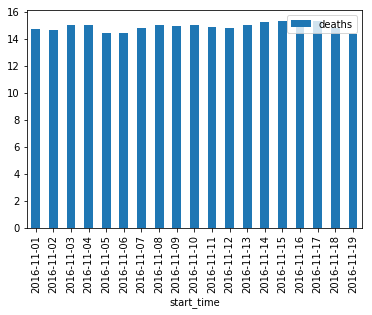

In [34]:
deaths_all = pd.pivot_table(df, index = ['team', 'start_time'], values = ['deaths'])
deaths_all.groupby('start_time').sum().plot(kind='bar')

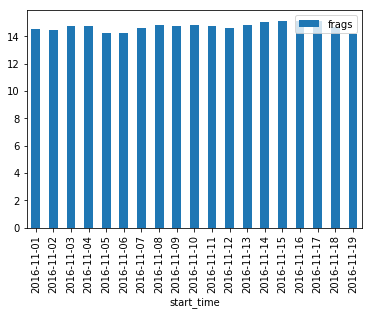

In [24]:
frags_all = pd.pivot_table(df, index = ['team', 'start_time'], values = ['frags'])
frags_all.groupby('start_time').sum().plot(kind='bar')

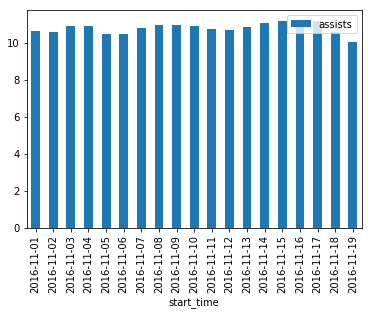

In [25]:
assists_all = pd.pivot_table(df, index = ['team', 'start_time'], values = ['assists'])
assists_all.groupby('start_time').sum().plot(kind='bar')

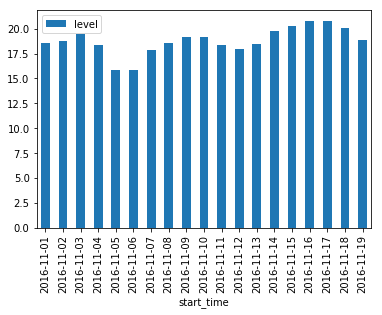

In [36]:
level_all = pd.pivot_table(df, index = ['team', 'start_time'], values = ['level'])
level_all.groupby('start_time').mean().plot(kind='bar')

In [ ]:
# посмотреть распределение лвл в команде по батл айди с учетом дня
# возможно изменение - меньший разброс по лвл в команде (в первый день встречаются игроки с низким уровнем в тиме с высокими)